In [1]:
from data_utils.prepare_data import load_celebA
from autoencoders.VQ_VAE.VQ_VAE import VQ_VAE,VQ_VAE2
from trainers.autoencoder_trainer import VQVAE_Trainer
from yaml import safe_load
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = safe_load(open("./configs/default_v2.yaml"))
train_dataloader, validation_dataloader, test_dataloader = load_celebA(
        config['img_size'], 
        config['validation_ratio'], 
        config['test_ratio'], 
        config['batch_size']
    )


In [3]:
vqvae_config = config['VQ-VAE']
if 'version' in vqvae_config.keys() and vqvae_config['version'] == 2:
    vqvae = VQ_VAE2(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size']
    )
else:
    vqvae_config['version'] = 1
    vqvae = VQ_VAE(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size']
    )
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vqvae_config['device'] = device

In [11]:
checkpoint = torch.load('./results/best_model_2.pth')
vqvae.load_state_dict(checkpoint)
_ = vqvae.to(device)

In [12]:
test_image = next(iter(train_dataloader))
vqvae.eval()
rec_images,_ = vqvae(test_image.to(device))

In [13]:
def map_to_correct_coordinates(image):
    return (image + 1) / 2

In [14]:
test_image_5 = test_image[:5]
rec_images_5 = rec_images[:5].detach().cpu().numpy()

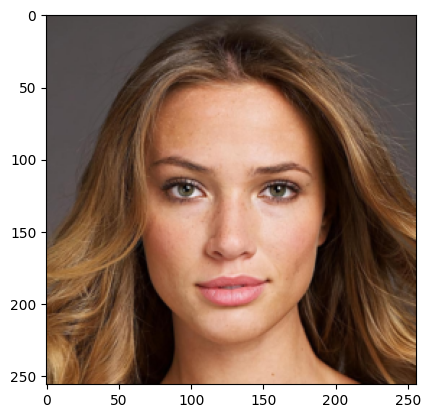

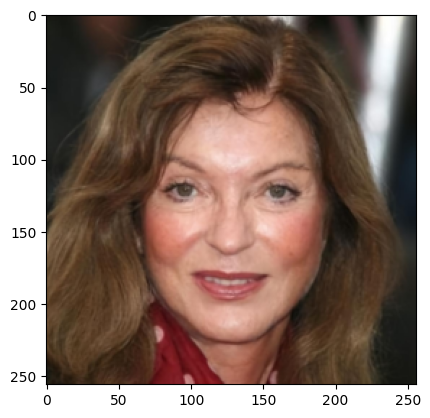

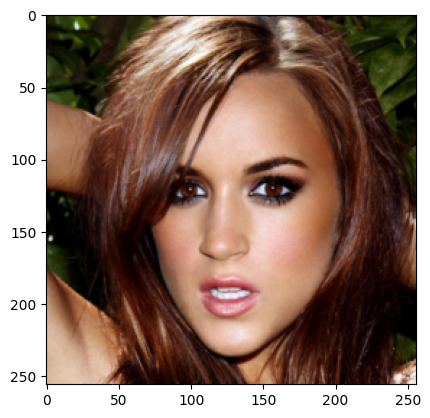

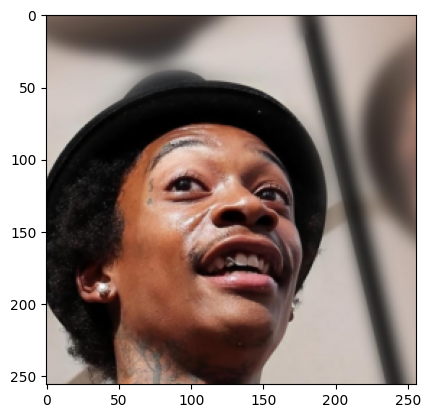

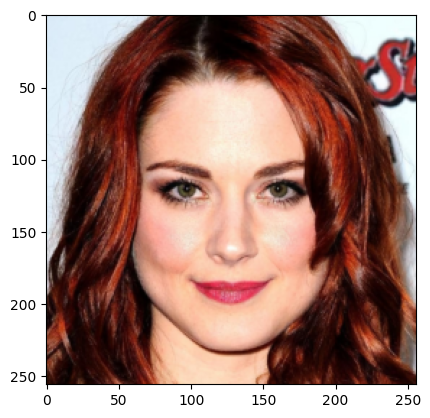

In [15]:
for img in test_image_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


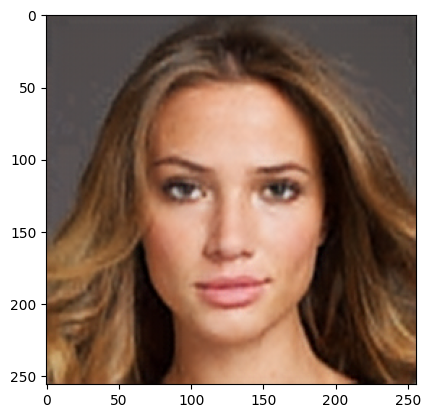

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


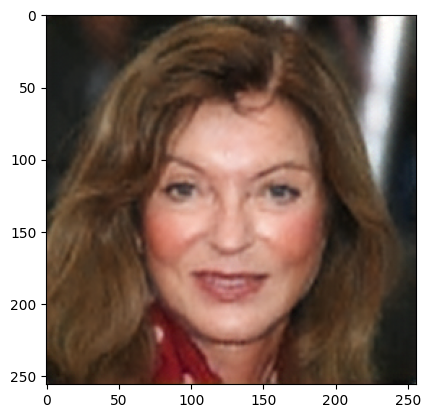

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


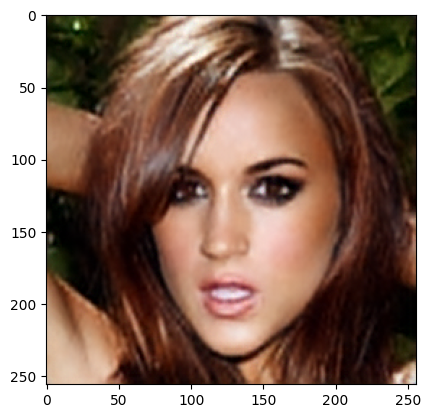

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


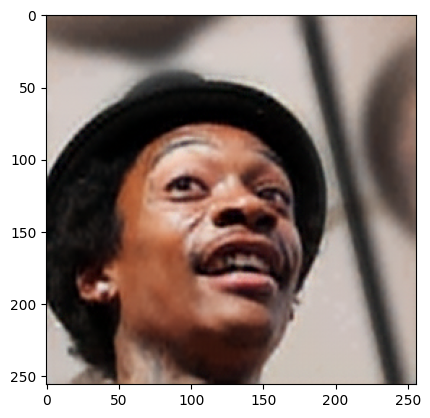

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


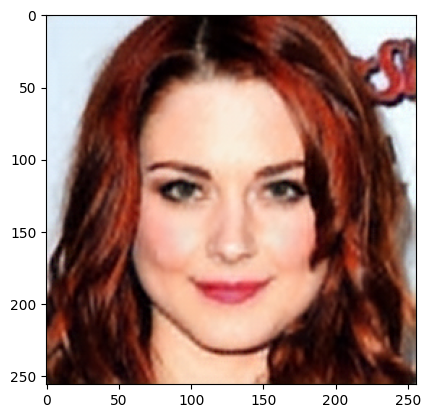

In [16]:
for img in rec_images_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(np.array(img), (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

In [1]:
vqvae.quantize_b.cluster_size>1

NameError: name 'vqvae' is not defined